In [1]:
import sys
sys.path.append('../')

from src.DataTest import DataTest

In [2]:
test = DataTest(

sql_path="../src/sql/data_test_time_series.sql", # this is relative to the location you run this instance from
project="e-commerce-demo-v",
dataset="summary",
table="s_ga_organic",
date_start="2017-01-01",
date_end="2017-03-28",
dim_sql_date="date",
dim_sql_index="entry_page",
dim_sql_dimensions=None,
kpis=["visits", "transactions", "revenue"],
aggs=["SUM","SUM","SUM"],
where_clause="",

dim_test_index="url",
regex=".",
date_test="2017-02-05",
batch_table="e-commerce-demo-v.tests.Batch1_product_content_2017-02-05"
)
vars(test)

{'_credential_path': '..\\secret.json',
 '_client': <google.cloud.bigquery.client.Client at 0x1d73a753150>,
 '_sql_path': '../src/sql/data_test_time_series.sql',
 '_project': 'e-commerce-demo-v',
 '_dataset': 'summary',
 '_table': 's_ga_organic',
 '_sql_file_string': 'SELECT\n*\n    -- {_dim_sql_date}\n    -- -- DISTINCT {_dim_index}\n    -- {_dim_sql_index}\n    -- {_dim_sql_dimensions}\n    -- {_kpi_aggregates}\nFROM `{_project}.{_dataset}.{_table}` facts\n  INNER JOIN `{_batch_tbl}` batch\n    on REGEXP_EXTRACT(facts.{_dim_sql_index},r"{_regex}") = REGEXP_EXTRACT(batch.{_dim_test_index},r"{_regex}")    \nWHERE \n    date BETWEEN "{_date_start}" AND "{_date_end}"\n    {_where_clause}\n    -- {_group_by_clause}',
 '_sql_variables': {'_batch_tbl',
  '_dataset',
  '_date_end',
  '_date_start',
  '_dim_index',
  '_dim_sql_date',
  '_dim_sql_dimensions',
  '_dim_sql_index',
  '_dim_test_index',
  '_group_by_clause',
  '_kpi_aggregates',
  '_project',
  '_regex',
  '_table',
  '_where_clau

In [3]:
test.get_data_sql()
test._data_sql

,date,entry_page,medium,isTrueDirect,visits,transactions,revenue,pageviews,bounce_rate,entry_page_dim,pagetype,product_type,category_type,product_id,product_id_dim,price,title_length,has description,description_length,has_image,lead_time,gender,date_dim,bizdays,dayofweek,date_week,bizdays_week,date_month,bizdays_month,date_quarter,bizdays_quarter,date_year,bizdays_year,url,id,test_batch,test_group,test_date
0,2017-03-08,shop.googlemerchandisestore.com/google+redesig...,organic,<NA>,2,0,NaN,3,0.5,shop.googlemerchandisestore.com/google+redesig...,category_page,None,None,None,None,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,None,2017-03-08,0,4,2017-03-05,4,2017-03-01,21,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05
1,2017-03-08,shop.googlemerchandisestore.com/google+redesig...,organic,<NA>,2,0,NaN,3,0.5,shop.googlemerchandisestore.com/google+redesig...,category_page,None,None,None,None,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,None,2017-03-08,0,4,2017-03-05,4,2017-03-01,21,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05
2,2017-03-08,shop.googlemerchandisestore.com/google+redesig...,organic,<NA>,2,0,NaN,3,0.5,shop.googlemerchandisestore.com/google+redesig...,category_page,None,None,None,None,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,None,2017-03-08,0,4,2017-03-05,4,2017-03-01,21,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05
3,2017-03-08,shop.googlemerchandisestore.com/google+redesig...,organic,<NA>,2,0,NaN,3,0.5,shop.googlemerchandisestore.com/google+redesig...,category_page,None,None,None,None,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,None,2017-03-08,0,4,2017-03-05,4,2017-03-01,21,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05
4,2017-03-08,shop.googlemerchandisestore.com/google+redesig...,organic,<NA>,2,0,NaN,3,0.5,shop.googlemerchandisestore.com/google+redesig...,category_page,None,None,None,None,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,None,2017-03-08,0,4,2017-03-05,4,2017-03-01,21,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89728,2017-02-14,shop.googlemerchandisestore.com/google+redesig...,organic,True,1,0,NaN,1,1.0,shop.googlemerchandisestore.com/google+redesig...,product_page,bags,None,25l+classic+rucksack,25l+classic+rucksack,20,20,<NA>,NaN,True,3,None,2017-02-14,1,3,2017-02-12,5,2017-02-01,20,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05
89729,2017-02-14,shop.googlemerchandisestore.com/google+redesig...,organic,True,1,0,NaN,1,1.0,shop.googlemerchandisestore.com/google+redesig...,product_page,bags,None,25l+classic+rucksack,25l+classic+rucksack,20,20,<NA>,NaN,True,3,None,2017-02-14,1,3,2017-02-12,5,2017-02-01,20,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05
89730,2017-02-14,shop.googlemerchandisestore.com/google+redesig...,organic,True,1,0,NaN,1,1.0,shop.googlemerchandisestore.com/google+redesig...,product_page,bags,None,25l+classic+rucksack,25l+classic+rucksack,20,20,<NA>,NaN,True,3,None,2017-02-14,1,3,2017-02-12,5,2017-02-01,20,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05
89731,2017-02-14,shop.googlemerchandisestore.com/google+redesig...,organic,True,1,0,NaN,1,1.0,shop.googlemerchandisestore.com/google+redesig...,product_page,bags,None,25l+classic+rucksack,25l+classic+rucksack,20,20,<NA>,NaN,True,3,None,2017-02-14,1,3,2017-02-12,5,2017-02-01,20,2017-01-01,63,2017-01-01,254,shop.googlemerchandisestore.com/google+redesig...,<NA>,1,Test,2017-02-05


# Estimate Test Length

In [4]:
estimated_time = test.estimate_time_to_significance("visits", effect_size=0.5, alpha=0.05, power=0.8)
print(f"Estimated time to significance based on historic data: {estimated_time} days")

historic std. dev. of visits: 17.220878444801986
historic sample size 6216
Estimated time to significance based on historic data: 26.137504465263437 days


# Causal Impact

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    11864.6            616959.0
Prediction (s.d.)         1062.41 (690.92)   55245.27 (35927.96)
95% CI                    [-349.04, 2359.33] [-18149.91, 122685.11]

Absolute effect (s.d.)    10802.19 (690.92)  561713.73 (35927.96)
95% CI                    [9505.27, 12213.63][494273.89, 635108.91]

Relative effect (s.d.)    1016.76% (65.03%)  1016.76% (65.03%)
95% CI                    [894.69%, 1149.62%][894.69%, 1149.62%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


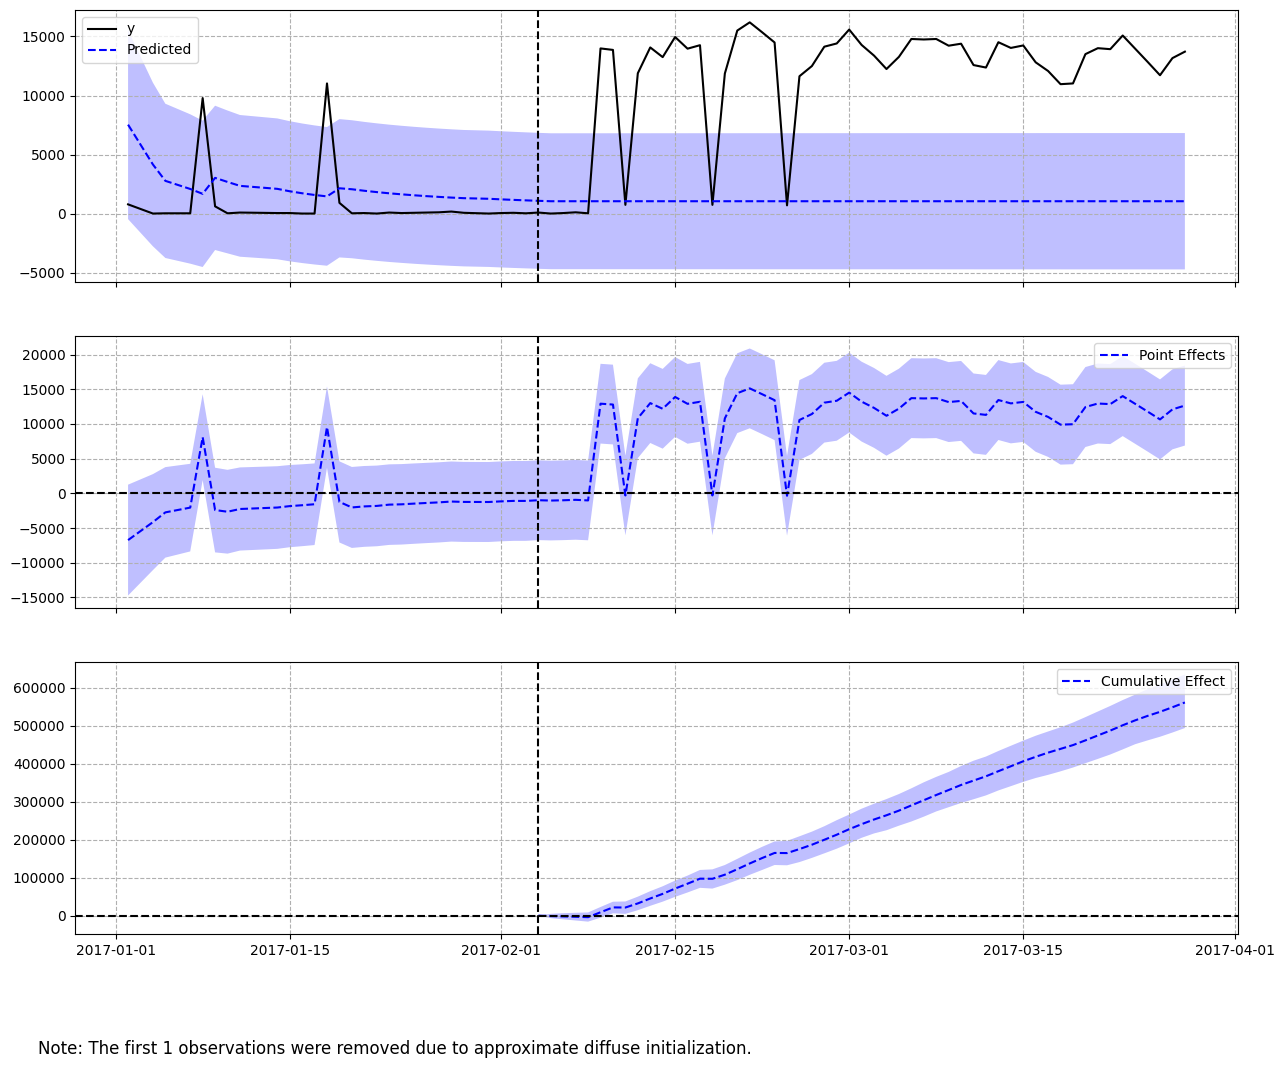

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 11864.6. By contrast, in the absence of an
intervention, we would have expected an average response of 1062.41.
The 95% interval of this counterfactual prediction is [-349.04, 2359.33].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 10802.19 with a 95% interval of
[9505.27, 12213.63]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 616959.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 55245.27. The 95% interval of this prediction is [-18149.91, 122685.11].


The above results are given in terms of absolute numbers. In relative


In [5]:
test.get_causal_impact(test_group="Test", metric_field="visits", agg="sum")